<img src="https://i.imgur.com/49FNOHj.jpg">

# Introduction

Today we'll dive deep into a dataset all about LEGO. From the dataset we can ask whole bunch of interesting questions about the history of the LEGO company, their product offering, and which LEGO set ultimately rules them all:

<ul type="square">
<li>What is the most enormous LEGO set ever created and how many parts did it have?</li>

<li>How did the LEGO company start out? In which year were the first LEGO sets released and how many sets did the company sell when it first launched?</li>

<li>Which LEGO theme has the most sets? Is it one of LEGO's own themes like Ninjago or a theme they licensed liked Harry Potter or Marvel Superheroes?</li>

<li>When did the LEGO company really expand its product offering? Can we spot a change in the company strategy based on how many themes and sets did it released year-on-year?</li>

<li>Did LEGO sets grow in size and complexity over time? Do older LEGO
sets tend to have more or fewer parts than newer sets?</li>
</ul>

**Data Source**

[Rebrickable](https://rebrickable.com/downloads/) has compiled data on all the LEGO pieces in existence. I recommend you use download the .csv files provided in this lesson.

# Import Statements

In [17]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
path_themes='/content/drive/My Drive/LEGO-Data (start)/data/themes.csv'
path_sets='/content/drive/My Drive/LEGO-Data (start)/data/sets.csv'
path_colors='/content/drive/My Drive/LEGO-Data (start)/data/colors.csv'


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


df_themes = pd.read_csv(path_themes)
df_sets = pd.read_csv(path_sets)
df_colors = pd.read_csv(path_colors)

In [4]:
df_sets.head()

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


In [13]:
df_colors.head()

,id,name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


In [6]:
df_themes.head()

,id,name,parent_id
0,1,Technic,NaN
1,2,Arctic Technic,1.0
2,3,Competition,1.0
3,4,Expert Builder,1.0
4,5,Model,1.0


# Data Exploration

**Challenge**: How many different colours does the LEGO company produce? Read the colors.csv file in the data folder and find the total number of unique colours. Try using the [.nunique() method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nunique.html?highlight=nunique#pandas.DataFrame.nunique) to accomplish this.

In [16]:
df_colors["rgb"].nunique()

124

**Challenge**: Find the number of transparent colours where <code>is_trans == 't'</code> versus the number of opaque colours where <code>is_trans == 'f'</code>. See if you can accomplish this in two different ways.

In [14]:
df_colors.value_counts("is_trans")

,count
is_trans,
f,107
t,28


In [20]:
df_colors.groupby("is_trans")["is_trans"].count()

,is_trans
is_trans,
f,107
t,28


**Challenge**: Change this into an h3 section heading:

<h3> Understanding LEGO Themes vs. LEGO Sets </h3>

Walk into a LEGO store and you will see their products organised by theme. Their themes include Star Wars, Batman, Harry Potter and many more.

**Challenge**: Display this image:
<img src="https://i.imgur.com/aKcwkSx.png">

A lego set is a particular box of LEGO or product. Therefore, a single theme typically has many different sets.

**Challenge**: Display this image
<img src=" https://i.imgur.com/whB1olq.png ">

The <code>sets.csv</code> data contains a list of sets over the years and the number of parts that each of these sets contained.

**Challenge**: Read the sets.csv data and take a look at the first and last couple of rows.

In [21]:
print(df_sets.head())
print(df_sets.tail())

  set_num                        name  year  theme_id  num_parts
0   001-1                       Gears  1965         1         43
1  0011-2           Town Mini-Figures  1978        84         12
2  0011-3  Castle 2 for 1 Bonus Offer  1987       199          0
3  0012-1          Space Mini-Figures  1979       143         12
4  0013-1          Space Mini-Figures  1979       143         12
           set_num                                 name  year  theme_id  \
15705      wwgp1-1  Wild West Limited Edition Gift Pack  1996       476   
15706   XMASTREE-1                       Christmas Tree  2019       410   
15707      XWING-1                  Mini X-Wing Fighter  2019       158   
15708      XWING-2                    X-Wing Trench Run  2019       158   
15709  YODACHRON-1      Yoda Chronicles Promotional Set  2013       158   

       num_parts  
15705          0  
15706         26  
15707         60  
15708         52  
15709        413  


In [22]:
df_sets.year.min()

1949

**Challenge**: In which year were the first LEGO sets released and what were these sets called?

In [25]:
df_sets.loc[df_sets.year.idxmin()]

,9521
set_num,700.1-1
name,Extra-Large Gift Set (ABB)
year,1949
theme_id,365
num_parts,142


**Challenge**: How many different sets did LEGO sell in their first year? How many types of LEGO products were on offer in the year the company started?

In [26]:
df_sets[df_sets["year"]==1949]

,set_num,name,year,theme_id,num_parts
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
9534,700.2-1,Large Gift Set (ABB),1949,365,178
9539,700.3-1,Medium Gift Set (ABB),1949,365,142
9544,700.A-1,Small Brick Set (ABB),1949,371,24
9545,700.B-1,Small Doors and Windows Set (ABB),1949,371,12


**Challenge**: Find the top 5 LEGO sets with the most number of parts.

In [28]:
df_sets.sort_values("num_parts", ascending=False).head()

,set_num,name,year,theme_id,num_parts
15004,BIGBOX-1,The Ultimate Battle for Chima,2015,571,9987
11183,75192-1,UCS Millennium Falcon,2017,171,7541
10551,71043-1,Hogwarts Castle,2018,246,6020
295,10256-1,Taj Mahal,2017,673,5923
221,10189-1,Taj Mahal,2008,673,5922


**Challenge**: Use <code>.groupby()</code> and <code>.count()</code> to show the number of LEGO sets released year-on-year. How do the number of sets released in 1955 compare to the number of sets released in 2019?

In [36]:
df_sets.groupby("year")["year"].count()

,year
year,
1949,5
1950,6
1953,4
1954,14
1955,28
...,...
2017,786
2018,816
2019,840


**Challenge**: Show the number of LEGO releases on a line chart using Matplotlib. <br>
<br>
Note that the .csv file is from late 2020, so to plot the full calendar years, you will have to exclude some data from your chart. Can you use the slicing techniques covered in Day 21 to avoid plotting the last two years? The same syntax will work on Pandas DataFrames.

In [46]:
df_setgraph=df_sets[~df_sets["year"].isin([2020,2021])].sort_values("year")

In [47]:
df_setgraph.head()

,set_num,name,year,theme_id,num_parts
9545,700.B-1,Small Doors and Windows Set (ABB),1949,371,12
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
9544,700.A-1,Small Brick Set (ABB),1949,371,24
9534,700.2-1,Large Gift Set (ABB),1949,365,178
9539,700.3-1,Medium Gift Set (ABB),1949,365,142


<Axes: xlabel='year', ylabel='num_parts'>

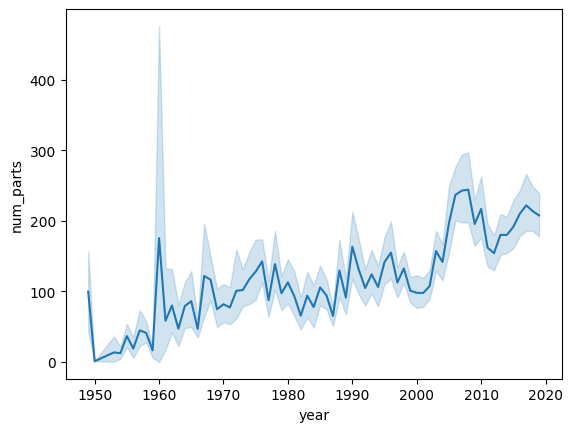

In [48]:
sns.lineplot(data=df_setgraph, x="year", y="num_parts")

### Aggregate Data with the Python .agg() Function

Let's work out the number of different themes shipped by year. This means we have to count the number of unique theme_ids per calendar year.

In [74]:
df2 = df_sets.groupby(["year","theme_id"])["num_parts"].count().reset_index()
df2

,year,theme_id,num_parts
0,1949,365,3
1,1949,371,2
2,1950,371,6
3,1953,366,1
4,1953,371,3
...,...,...,...
2884,2020,702,11
2885,2020,705,1
2886,2020,706,7
2887,2020,709,4


In [77]:
df2= df2.groupby("year")["theme_id"].count().reset_index()
df2

,year,theme_id
0,1949,2
1,1950,1
2,1953,2
3,1954,2
4,1955,4
...,...,...
66,2017,89
67,2018,93
68,2019,78
69,2020,82


In [78]:
df2.rename(columns=({"theme_id":"num_themes"}),inplace=True)

**Challenge**: Plot the number of themes released by year on a line chart. Only include the full calendar years (i.e., exclude 2020 and 2021).

In [79]:
df2 = df2[~df2["year"].isin([2020,2021])].sort_values("year")

<Axes: xlabel='year', ylabel='num_themes'>

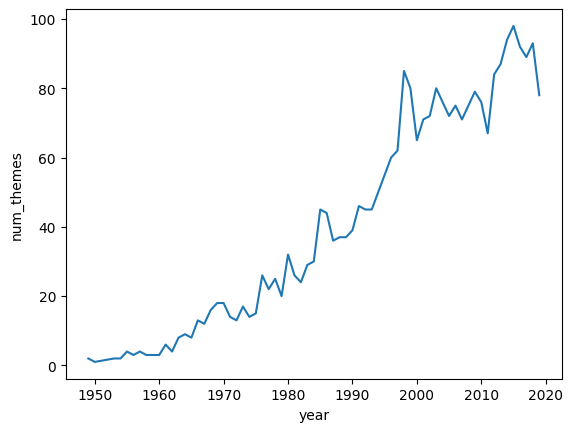

In [80]:
sns.lineplot(data=df2, x="year", y="num_themes")

### Line Charts with Two Seperate Axes

**Challenge**: Use the <code>.groupby()</code> and <code>.agg()</code> function together to figure out the average number of parts per set. How many parts did the average LEGO set released in 1954 compared to say, 2017?

In [59]:
df_parts = df_setgraph.groupby("year").agg({"num_parts":"mean"})
df_parts

,num_parts
year,
1949,99.600000
1950,1.000000
1953,13.500000
1954,12.357143
1955,36.607143
...,...
2015,191.379845
2016,209.920740
2017,221.840967


<Axes: xlabel='year'>

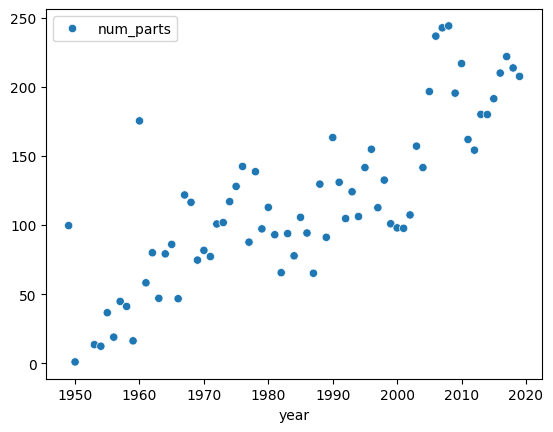

In [64]:
sns.scatterplot(data=df_parts)

### Scatter Plots in Matplotlib

**Challenge**: Has the size and complexity of LEGO sets increased over time based on the number of parts? Plot the average number of parts over time using a Matplotlib scatter plot. See if you can use the [scatter plot documentation](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.scatter.html) before I show you the solution. Do you spot a trend in the chart?

In [ ]:
# Yes

### Number of Sets per LEGO Theme

LEGO has licensed many hit franchises from Harry Potter to Marvel Super Heros to many others. But which theme has the largest number of individual sets?

In [65]:
df_sets.columns

Index(['set_num', 'name', 'year', 'theme_id', 'num_parts'], dtype='object')

In [66]:
df_sets.loc[df_sets.num_parts.idxmin()]

,2
set_num,0011-3
name,Castle 2 for 1 Bonus Offer
year,1987
theme_id,199
num_parts,0


**Challenge** Use what you know about HTML markup and tags to display the database schema:

<img src=" https://i.imgur.com/Sg4lcjx.png">

### Database Schemas, Foreign Keys and Merging DataFrames

The themes.csv file has the actual theme names. The sets .csv has <code>theme_ids</code> which link to the <code>id</code> column in the themes.csv.

**Challenge**: Explore the themes.csv. How is it structured? Search for the name 'Star Wars'. How many <code>id</code>s correspond to this name in the themes.csv? Now use these <code>id</code>s and find the corresponding the sets in the sets.csv (Hint: you'll need to look for matches in the <code>theme_id</code> column)

In [67]:
df_themes[df_themes["id"]==199]

,id,name,parent_id
164,199,Lion Knights,186.0


In [73]:
df_themes[df_themes["name"]=="Star Wars"]

,id,name,parent_id
17,18,Star Wars,1.0
150,158,Star Wars,NaN
174,209,Star Wars,207.0
211,261,Star Wars,258.0


### Merging (i.e., Combining) DataFrames based on a Key


In [69]:
merged_df= df_themes.merge(df_sets, left_on="id", right_on="theme_id", how="left")
merged_df.shape

(15735, 8)

In [70]:
merged_df.head()

,id,name_x,parent_id,set_num,name_y,year,theme_id,num_parts
0,1,Technic,NaN,001-1,Gears,1965.0,1.0,43.0
1,1,Technic,NaN,002-1,4.5V Samsonite Gears Motor Set,1965.0,1.0,3.0
2,1,Technic,NaN,1030-1,TECHNIC I: Simple Machines Set,1985.0,1.0,191.0
3,1,Technic,NaN,1038-1,ERBIE the Robo-Car,1985.0,1.0,120.0
4,1,Technic,NaN,1039-1,Manual Control Set 1,1986.0,1.0,39.0


In [72]:
merged_df[merged_df["name_x"]=="Star Wars"]

,id,name_x,parent_id,set_num,name_y,year,theme_id,num_parts
505,18,Star Wars,1.0,65081-1,R2-D2 / C-3PO Droid Collectors Set,2002.0,18.0,1.0
506,18,Star Wars,1.0,8000-1,Pit Droid,2000.0,18.0,223.0
507,18,Star Wars,1.0,8001-1,Battle Droid,2000.0,18.0,336.0
508,18,Star Wars,1.0,8002-1,Destroyer Droid,2000.0,18.0,567.0
509,18,Star Wars,1.0,8007-1,C-3PO,2001.0,18.0,339.0
...,...,...,...,...,...,...,...,...
4004,209,Star Wars,207.0,75279-1,Star Wars Advent Calendar 2020,2020.0,209.0,312.0
4005,209,Star Wars,207.0,7958-1,Star Wars Advent Calendar 2011,2011.0,209.0,267.0
4006,209,Star Wars,207.0,9509-1,Star Wars Advent Calendar 2012,2012.0,209.0,235.0
4844,261,Star Wars,258.0,9748-1,Droid Developer Kit,1999.0,261.0,658.0
